In [1]:
import pandas as pd

## Styling using Seaborn

In [2]:
reviews = pd.read_csv('winemag-data-130k-v2.csv',index_col=0)

reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### Count Plot
pandas bar chart becomes seaborn's count plot

In [ ]:
import seaborn as sb

sb.countplot(reviews['points'])

### KDE Plot
KDE, short for "kernel density estimate", is a statistical technique for smoothing out data noise. It addresses an important fundamental weakness of a line chart: it will buff out outlier or "in-betweener" values which would cause a line chart to suddenly dip.

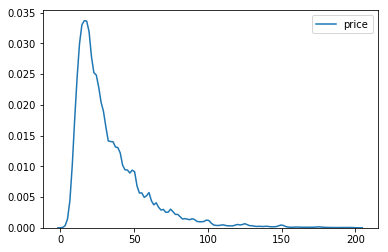

In [4]:
sb.kdeplot(reviews.query('price < 200').price)

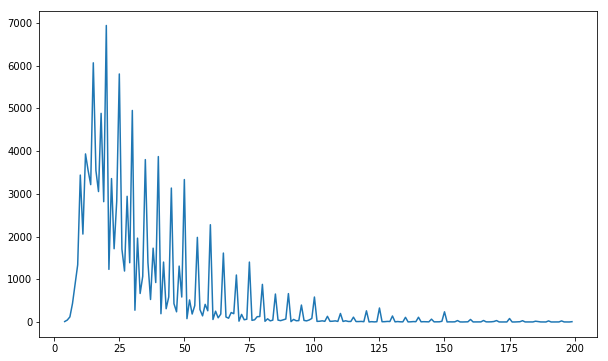

In [5]:
reviews[reviews['price'] < 200]['price'].value_counts().sort_index().plot.line(figsize=(10,6))

A Kde plots is better than line chart in getting the true shape of Interval data.

Almost, always use kde plots instead of line chart as it provides clear view.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


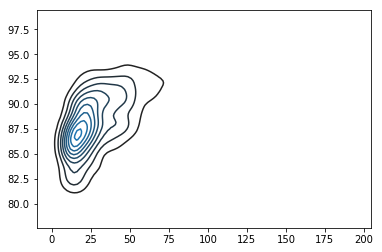

In [6]:
sb.kdeplot(reviews[reviews['price'] < 200].loc[:,['price','points']].dropna().sample(1000))

### Dist Plot

### Scatterplot  and Hexplot
Bivarient plotting of data

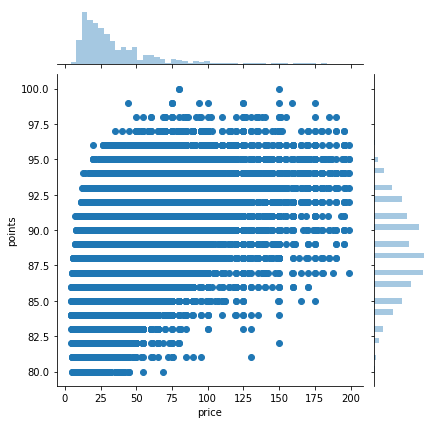

In [7]:
sb.jointplot(x="price",y="points",data=reviews[reviews['price'] < 200])

Use Hexa plot for better visibility on large dataset

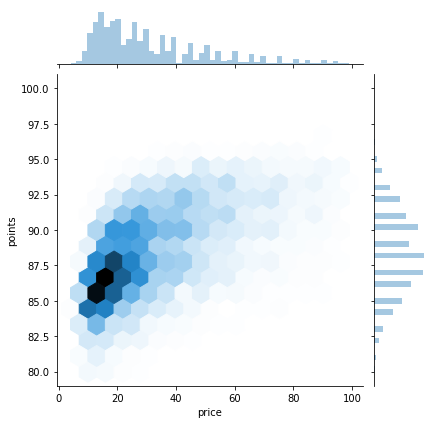

In [8]:
sb.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100], kind='hex', gridsize=16)

In [9]:
pokemon = pd.read_csv('Pokemon.csv',index_col=0)

pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


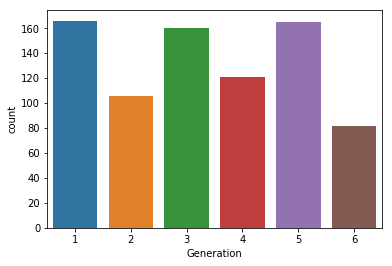

In [10]:
sb.countplot(pokemon['Generation'])

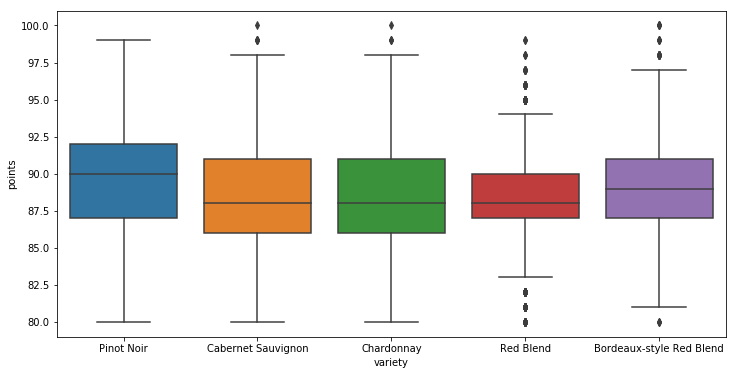

In [11]:
import matplotlib.pyplot as plt

top_wines = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]

plt.figure(figsize=(12,6))

sb.boxplot(
    x='variety',
    y='points',
    data=top_wines
)

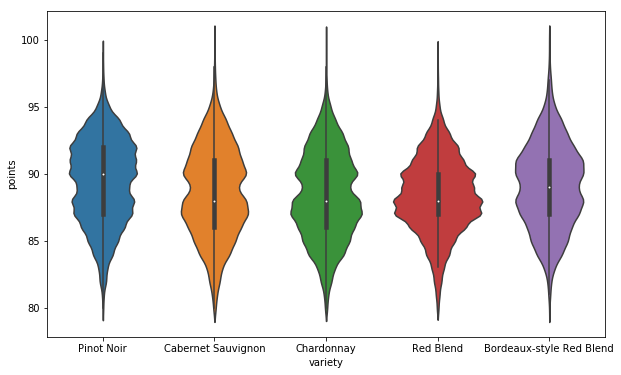

In [12]:
plt.figure(figsize=(10,6))

sb.violinplot(
    x='variety',
    y='points',
    data=top_wines
)

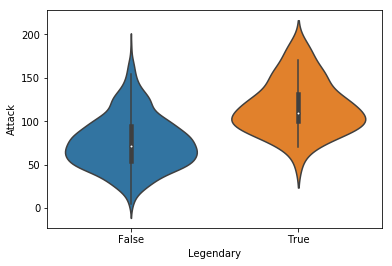

In [13]:
sb.violinplot(
    x="Legendary",
    y="Attack",
    data=pokemon
)

### Faceting with seaborn
Faceting is the act of breaking data variables up across multiple subplots, and combining those subplots into a single figure. So instead of one bar chart, we might have, say, four, arranged together in a grid.

In [14]:
footballers = pd.read_csv('CompleteDataset.csv',index_col=0)

footballers.index

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            17971, 17972, 17973, 17974, 17975, 17976, 17977, 17978, 17979,
            17980],
           dtype='int64', length=17981)

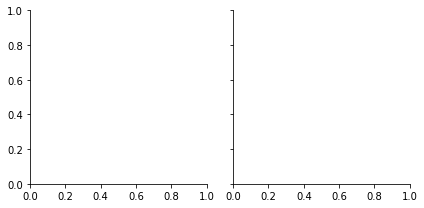

In [15]:
g = sb.FacetGrid(pokemon, col='Legendary')

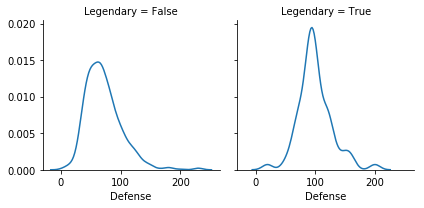

In [16]:
g = sb.FacetGrid(pokemon, col='Legendary')

g.map(sb.kdeplot,'Defense')

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


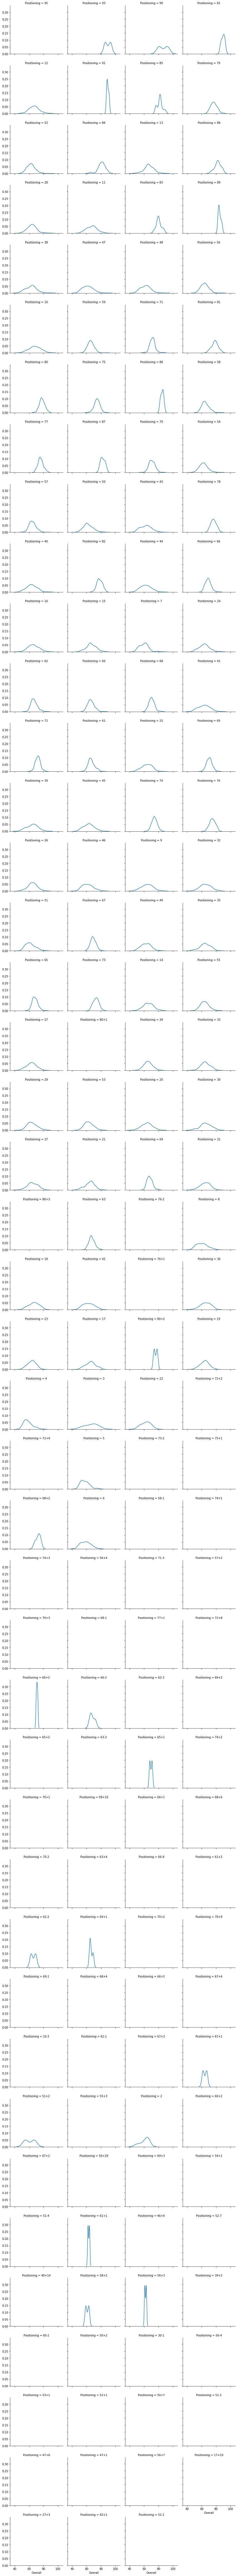

In [31]:
g = sb.FacetGrid(footballers, col="Positioning", col_wrap=4)

g.map(sb.kdeplot, 'Overall')